install this library for Fuzzification process

In [ ]:
!pip install scikit-fuzzy

fuzzy of The daily available man hours for the chassis assembly line is 1800 with Trapezoidal Membership Function

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Universe of discourse for Chassis Assembly Hours
Chassis_Assembly_Hours = np.arange(0, 2100, 1)  # range values from 0 to 2100

# Fuzzy variable for Chassis Assembly Hours
assembly_hours_fuzzy = ctrl.Antecedent(Chassis_Assembly_Hours, 'Chassis_Assembly_Hours')

# Membership functions for Chassis Assembly Hours using trapezoidal membership functions
assembly_hours_fuzzy['low'] = fuzz.trapmf(assembly_hours_fuzzy.universe, [0, 0, 600, 1000])
assembly_hours_fuzzy['medium'] = fuzz.trapmf(assembly_hours_fuzzy.universe, [800, 1000, 1400, 1600])
assembly_hours_fuzzy['high'] = fuzz.trapmf(assembly_hours_fuzzy.universe, [1400, 1600, 2000, 2000])


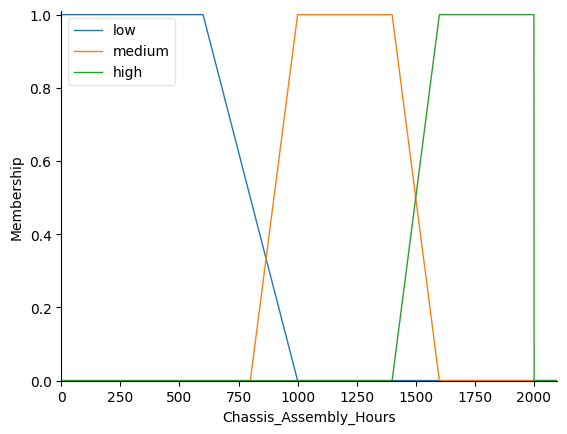

In [ ]:
# Visualize these membership functions
assembly_hours_fuzzy.view()
#show the plot
plt.show()


one example of change from Crisp value to fuzzy.

In [ ]:
crisp_Chassis_Assembly_Hours = 1750
# Fuzzify the crisp Chassis_Assembly_Hours
fuzzy_value_low = fuzz.interp_membership(assembly_hours_fuzzy.universe,assembly_hours_fuzzy['low'].mf, crisp_Chassis_Assembly_Hours)
fuzzy_value_medium = fuzz.interp_membership(assembly_hours_fuzzy.universe, assembly_hours_fuzzy['medium'].mf, crisp_Chassis_Assembly_Hours)
fuzzy_value_high = fuzz.interp_membership(assembly_hours_fuzzy.universe, assembly_hours_fuzzy['high'].mf, crisp_Chassis_Assembly_Hours)

print(f"Fuzzy value for 'low' at {crisp_Chassis_Assembly_Hours}: {fuzzy_value_low}")
print(f"Fuzzy value for 'medium' at {crisp_Chassis_Assembly_Hours}: {fuzzy_value_medium}")
print(f"Fuzzy value for 'high' at {crisp_Chassis_Assembly_Hours}: {fuzzy_value_high}")

Fuzzy value for 'low' at 1750: 0.0
Fuzzy value for 'medium' at 1750: 0.0
Fuzzy value for 'high' at 1750: 1.0


In [ ]:
assembly_hours_fuzzy['medium'].mf[1250]

1.0

code of defuzzification process

In [ ]:
# Simulate 'defuzzified' demand using Monte Carlo simulation
num_simulations = 4
defuzzified_Chassis_Assembly_Hours = []

for i in range(num_simulations):
    print("Iteration number:",i+1,"/{}.".format(num_simulations))
    print("----------------------------")
    print("----------------------------")
    while True:
        x = np.random.uniform(0, 1800)  # Random x within [0, 1800]
        u = fuzz.interp_membership(assembly_hours_fuzzy.universe, assembly_hours_fuzzy['high'].mf, x)
        alpha = np.random.uniform(0, 1)
        print("x=",x,"u=",u,"alpha=",alpha)
        print("---------")
        if alpha <= u:
            defuzzified_Chassis_Assembly_Hours.append(x)
            break

Iteration number: 1 /4.
----------------------------
----------------------------
x= 87.98593014078826 u= 0.0 alpha= 0.05796022300275239
---------
x= 1401.627729470422 u= 0.00813864735211041 alpha= 0.6190666115345043
---------
x= 1322.2159428628356 u= 0.0 alpha= 0.8865617676268859
---------
x= 656.8730043152079 u= 0.0 alpha= 0.08738804751662266
---------
x= 167.59150486828239 u= 0.0 alpha= 0.275932409117318
---------
x= 1532.7161635504917 u= 0.6635808177524587 alpha= 0.5824687636820158
---------
Iteration number: 2 /4.
----------------------------
----------------------------
x= 586.2290469300289 u= 0.0 alpha= 0.7576565005876171
---------
x= 723.8024870927567 u= 0.0 alpha= 0.7384609684311012
---------
x= 857.5964772062465 u= 0.0 alpha= 0.44724318121443396
---------
x= 1260.9237053639347 u= 0.0 alpha= 0.8768954520436874
---------
x= 1342.792466548468 u= 0.0 alpha= 0.9525447084700102
---------
x= 1531.356535364869 u= 0.6567826768243447 alpha= 0.003063506291472007
---------
Iteration numb

In [ ]:
defuzzified_Chassis_Assembly_Hours

[1532.7161635504917, 1531.356535364869, 1598.876798319167, 1754.2292249833379]

Average 'defuzzified' demand over x simulations:

In [ ]:
# Calculate the average 'defuzzified' demand
average_defuzzified_Chassis_Assembly_Hours = np.mean(defuzzified_Chassis_Assembly_Hours)
avg1=average_defuzzified_Chassis_Assembly_Hours
print(f"Average 'defuzzified' demand over {num_simulations} simulations: {avg1:.2f}")

Average 'defuzzified' demand over 4 simulations: 1604.29


fuzzy of The daily available production line hours = 240

In [ ]:
# Universe of discourse for production line hours
production_line_hours = np.arange(0, 300, 1)  # range values from 0 to 300

# Fuzzy variable for production line hours
production_line_hours_fuzzy = ctrl.Antecedent(production_line_hours, 'production_line_hours')

# Define membership functions
low_mf = fuzz.trimf(production_line_hours_fuzzy.universe, [0, 80, 120])
medium_mf = fuzz.trimf(production_line_hours_fuzzy.universe, [100, 160, 200])
high_mf = fuzz.trimf(production_line_hours_fuzzy.universe, [180, 240, 300])

# Assign membership functions
production_line_hours_fuzzy['low'] = low_mf
production_line_hours_fuzzy['medium'] = medium_mf
production_line_hours_fuzzy['high'] = high_mf

graph of 3 membership

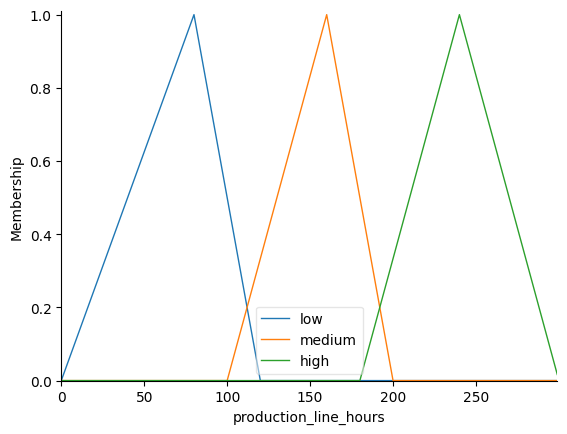

In [ ]:
# Visualize the membership functions
production_line_hours_fuzzy.view()
#show the plot
plt.show()


one example of change from Crisp value to fuzzy.

In [ ]:
crisp_production_line_hours= 110
# Fuzzify the crisp production_line_hours
fuzzy_value_low = fuzz.interp_membership(production_line_hours_fuzzy.universe, low_mf, crisp_production_line_hours)
fuzzy_value_medium = fuzz.interp_membership(production_line_hours_fuzzy.universe, medium_mf, crisp_production_line_hours)
fuzzy_value_high = fuzz.interp_membership(production_line_hours_fuzzy.universe,  high_mf, crisp_production_line_hours)

print(f"Fuzzy value for 'low' at {crisp_production_line_hours}: {fuzzy_value_low}")
print(f"Fuzzy value for 'medium' at {crisp_production_line_hours}: {fuzzy_value_medium}")
print(f"Fuzzy value for 'high' at {crisp_production_line_hours}: {fuzzy_value_high}")

Fuzzy value for 'low' at 110: 0.25
Fuzzy value for 'medium' at 110: 0.16666666666666666
Fuzzy value for 'high' at 110: 0.0


code of defuzzification process

In [ ]:
# Simulate 'defuzzified' demand using Monte Carlo simulation
num_simulations = 4
defuzzified_production_line_hours = []

for i in range(num_simulations):
    print("Iteration number:",i+1,"/{}.".format(num_simulations))
    print("----------------------------")
    print("----------------------------")
    while True:
        x = np.random.uniform(0, 240)  # Random x within [0, 240]
        u = fuzz.interp_membership(production_line_hours_fuzzy.universe, production_line_hours_fuzzy['medium'].mf, x)
        alpha = np.random.uniform(0, 1)
        print("x=",x,"u=",u,"alpha=",alpha)
        print("---------")
        if alpha <= u:
            defuzzified_production_line_hours.append(x)
            break

Iteration number: 1 /4.
----------------------------
----------------------------
x= 62.351892906598664 u= 0.0 alpha= 0.3330377984156523
---------
x= 193.71329320518353 u= 0.15716766987041167 alpha= 0.46342746682529523
---------
x= 25.267178625128032 u= 0.0 alpha= 0.04214855383661864
---------
x= 99.55522683226577 u= 0.0 alpha= 0.47301047220200554
---------
x= 21.07706763043323 u= 0.0 alpha= 0.5886731209559589
---------
x= 62.59764072424514 u= 0.0 alpha= 0.8757702311146836
---------
x= 172.50475255228955 u= 0.6873811861927613 alpha= 0.9009708174640138
---------
x= 121.27064867287073 u= 0.3545108112145122 alpha= 0.9150144414850038
---------
x= 161.21766508091605 u= 0.9695583729770988 alpha= 0.34915094178614015
---------
Iteration number: 2 /4.
----------------------------
----------------------------
x= 37.77058403384303 u= 0.0 alpha= 0.5309258677060602
---------
x= 6.306826272763741 u= 0.0 alpha= 0.26166263155067837
---------
x= 144.50182497830326 u= 0.741697082971721 alpha= 0.24801862

In [ ]:
defuzzified_production_line_hours

[161.21766508091605, 144.50182497830326, 128.7001353223626, 158.85067241794326]

Average 'defuzzified' demand over x simulations:

In [ ]:
# Calculate the average 'defuzzified' demand
average_defuzzified_production_line_hours = np.mean(defuzzified_production_line_hours)
avg2=average_defuzzified_production_line_hours
print(f"Average 'defuzzified' demand over {num_simulations} simulations: {avg2:.2f}")

Average 'defuzzified' demand over 4 simulations: 148.32


In [ ]:
import random
import math
class ManufacturingGA:
    def __init__(self, pop_size: int, R_max: int, R_min: int, crossover_prob: float, mutation_prob: float):
        """
        Initialize the genetic algorithm parameters.
        """
        self.pop_size = pop_size
        self.R_max = R_max
        self.R_min = R_min
        self.crossover_prob = crossover_prob
        self.mutation_prob = mutation_prob

    def initialize_population(self):
        """
        Initialize the population with random individuals.
        """
        return [[random.randint(self.R_min, self.R_max) for _ in range(2)] for _ in range(self.pop_size)]

    def evaluate_fitness(self, individual):
        """
        Evaluate the fitness of an individual solution.
        """

        x1, x2 = individual
        profit_bw = 150 * x1
        profit_colored = 450 * x2
        return profit_bw + profit_colored

    def linear_rank_selection(self, pop, sp):
        """
        Perform linear rank selection to assign probabilities to individuals.
        """
        pop_size = len(pop)
        pop_fitness = [self.evaluate_fitness(indv) for indv in pop]
        ranks = np.array(pop_fitness).argsort().argsort() + 1
        pop_linear_rank_fitness = [(2 - sp) + 2 * (sp - 1) * (rank - 1) / (pop_size - 1) for rank in ranks]

        # Normalize probabilities
        total_prob = sum(pop_linear_rank_fitness)
        normalized_probabilities = [prob / total_prob for prob in pop_linear_rank_fitness]
        return normalized_probabilities

    def select_parents(self, pop, pop_fitness):
        """
        Select parents based on cumulative probabilities.
        """
        cumulative_probabilities = np.cumsum(self.linear_rank_selection(pop, sp))
        selected_parents = random.choices(pop, cum_weights=cumulative_probabilities, k=2)
        return selected_parents

    def crossover(self, parents):
        """
        Perform crossover between two parents.
        """
        if random.random() < self.crossover_prob:
            crossover_point = random.randint(1, len(parents[0]) - 1)
            offspring1 = parents[0][:crossover_point] + parents[1][crossover_point:]
            offspring2 = parents[1][:crossover_point] + parents[0][crossover_point:]
            return [offspring1, offspring2]
        else:
            return parents

    def mutate(self, individual):
        """
        Perform mutation on an individual.
        """
        mutated_individual = [bit ^ 1 if random.random() < self.mutation_prob else bit for bit in individual]
        return mutated_individual

    def constraints_satisfied(self, individual):
        x1 , x2 = individual
        # Check constraints
        if x2 > 50:
            return False
        #using Average 'defuzzified' demand over 4 simulations insteade of main values of problem
        if (6*x1 + 18*x2) > avg1:
            return False
        if (x1 + 1.6*x2) > avg2:
            return False
        if (0.5*x1 + 2*x2) > 162:
            return False
        return True

    def solve(self, max_generations: int, sp: float):
        # Initialization
        self.population = self.initialize_population()

        for generation in range(max_generations):
            pop_fitness = [self.evaluate_fitness(indv) for indv in self.population]

            # Parent selection
            selected_parents = [self.select_parents(self.population, pop_fitness) for _ in range(self.pop_size // 2)]

            # Crossover
            offspring = [child for parent_pair in selected_parents for child in self.crossover(parent_pair)]

            # Mutation
            mutated_offspring = [self.mutate(child) for child in offspring]

            # Ensure constraints are satisfied
            mutated_offspring = [child for child in mutated_offspring if self.constraints_satisfied(child)]

            # Combine parents and mutated offspring
            combined_pop = self.population + mutated_offspring

            # Select the next generation
            next_gen_indices = np.random.choice(len(combined_pop), size=self.pop_size, p=self.linear_rank_selection(combined_pop, sp))
            self.population = [combined_pop[i] for i in next_gen_indices]

        best_solution = max(self.population, key=self.evaluate_fitness)
        return best_solution


if __name__ == "__main__":
    pop_size = 100
    R_max = 50  # Maximum number of TV sets (colored)
    R_min = 0   # Minimum number of TV sets
    crossover_prob = 0.6
    mutation_prob = 0.05
    max_generations = 100
    sp = 1.5  # Selection pressure

    manufacturing_ga = ManufacturingGA(pop_size, R_max, R_min, crossover_prob, mutation_prob)
    best_solution = manufacturing_ga.solve(max_generations, sp)

    print("Best solution:", best_solution)
    print("Fitness:", manufacturing_ga.evaluate_fitness(best_solution))

Best solution: [49, 49]
Fitness: 29400
